# Analysis of Health Insurance Charges Across Different Demographics

**Niramay Patel, Vincent Nguyen**


## Introduction ##

The purpose of this topic is to analyze how different demographics and individual characteristics influence health care costs for people. We wish to find out if there are certain characteristics that influence the health charges, and how the magnitude of these influences differ across other characteristics. With this analysis, we could inform the general public about how these charges disproportionately affect certain individuals in hopes of raising conversations about fair pay. Using this data, we will suggest/argue for changes in the field of medicine so that everyone is able to afford adequate healthcare. We hypothesize that there could be unfair cost disadvantages for certain patients depending on their body type of other attributes, and we would like to study this data set to see exactly how cost is determined and where change could be made for the future.



## Data Curation ##

Source link: www.kaggle.com/datasets/mirichoi0218/insurance/data

There are multiple ways to get data, such as web scraping and using API calls. For this project, we are choosing to use a Medical Cost Personal DataSet retrieved from Kaggle that stores information about individuals' medical history, physical attributes, and their overall medical costs. Specifically, it includes the age of the beneficiary, sex, BMI (body mass index), number of children covered by health insurance, whether or not the person is a smoker, the beneficiary's region (residential area) in the U.S (northeast, northwest, southeast, southwest), and medical costs charged by the insurance.

We are using a pandas DataFrame for our data.

**REQUIRED TOOLS**

* pandas
* matplotlib.pyplot
* seaborn
* scipy.stats
* numpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


insurance_df = pd.read_csv('insurance.csv')

Below, we can see that the DataFrame now contains the information of many individuals and their overall medical costs, labled 'charges'.

In [2]:
insurance_df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# Check status of Types
# Ensure all Types are correct for the necessary testing below
print(insurance_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
print(insurance_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
info = insurance_df.count()
print(info)

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


In [6]:
# Handle any missing values
insurance_df.dropna(inplace=True)
print(insurance_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Boxplots ###

Displayed below are six different box plots, one for each feature, as this helps us see how a feature could affect the medical charges.  

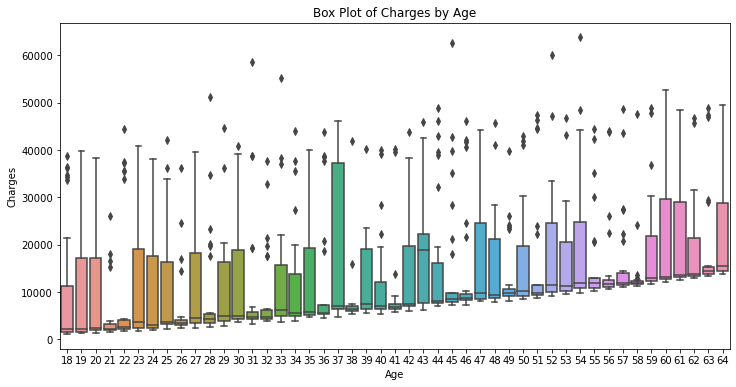

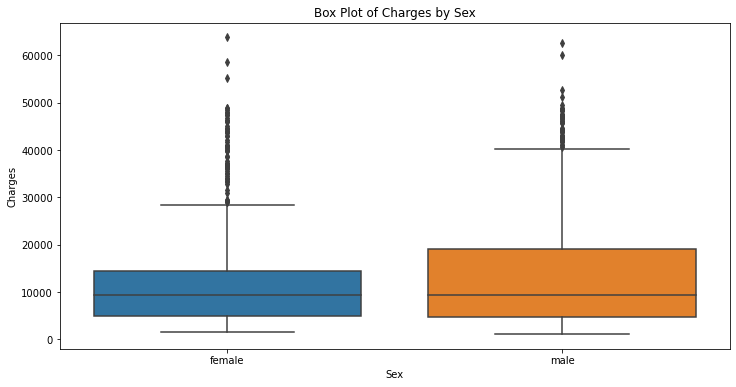

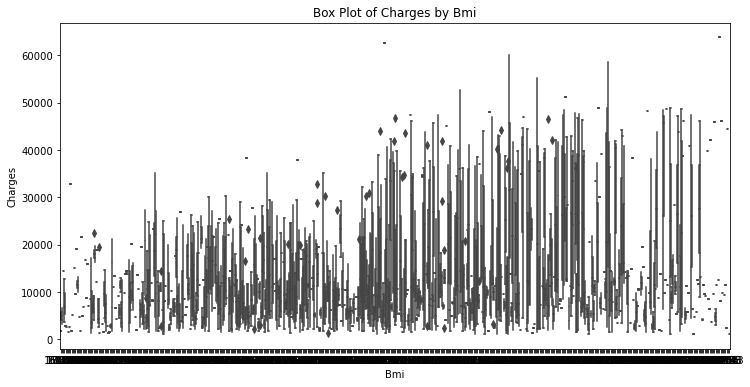

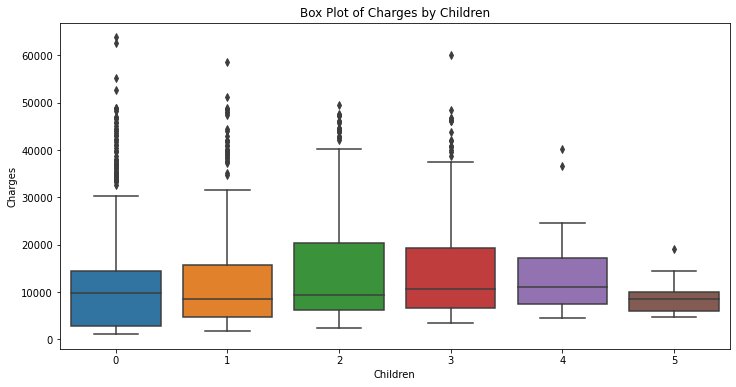

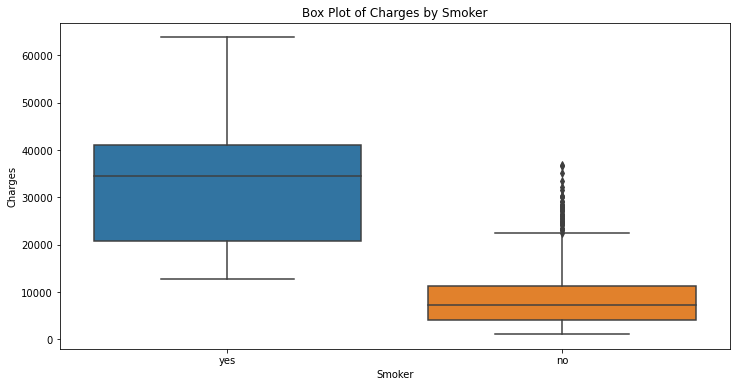

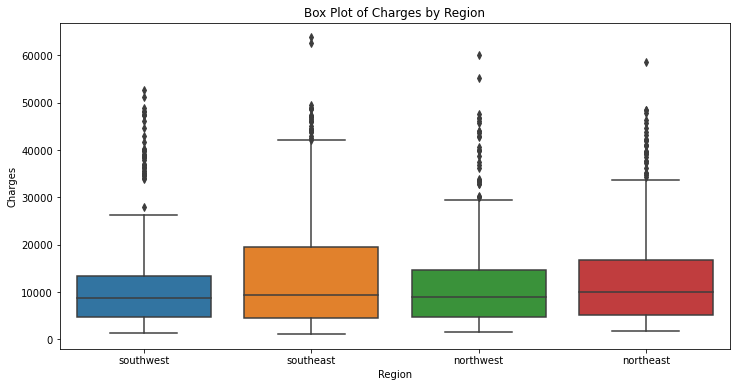

In [7]:
# Box Plots for each feature
for feature in insurance_df.columns[:-1]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='charges', data=insurance_df)
    plt.title(f'Box Plot of Charges by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()

Age Box Plot: The plot reveals a trend of increasing charges with age, with older individuals showing higher medical expenses.

Sex Box Plot: The box plot indicates similar median charges for males and females, with no significant gender-based difference. However, it appears that higher charges are more common among males as we can see that the upper whisker extends a bit higher than that of the females. 

BMI Box Plot: Higher BMI categories are associated with higher medical charges, highlighting the impact of obesity on healthcare costs.

Children Box Plot: The medians seem similar across different numbers with slight variations.

Smoker Box Plot: The box plot shows that smokers have a higher median charge and a wider range of charges, highlighting the impact of smoking on insurance charges.

Region Box Plot: The box plots show some regional variations in charges, but the medians appear very similar for the most part. However, it appears that higher charges are more common in the southeast region as we can see that the upper whisker extends a bit higher than that of the other regions.

## EXPLORATORY ANALYSIS ##

### Regression Analysis ###

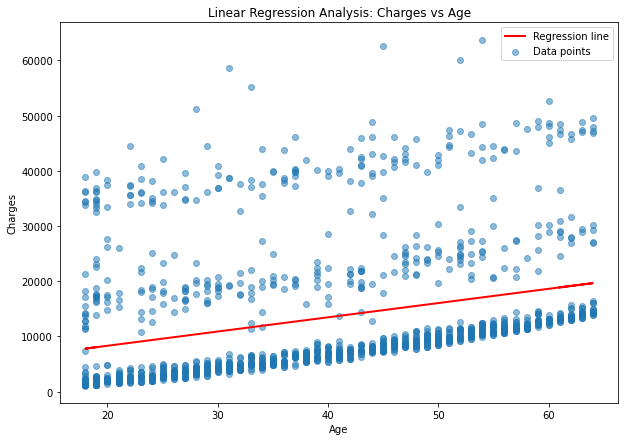

R: 0.2990081933306477
R-Squared: 0.089405899678858


In [8]:
# REGRESSION ANALYSIS

x = insurance_df['age']
y = insurance_df['charges']

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
r_squared = r**2

# Define the regression function
def regressionFunction(x):
    return slope * x + intercept

# Create the model predictions
model = list(map(regressionFunction, x))

# Plot the data points and the regression line
plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, model, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Analysis: Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()
print(f"R: {r}")
print(f"R-Squared: {r_squared}")

Analyzing Change in Price across Age using Linear Regression (LINEAR REGRESSION TEST CONCLUSION)

Performing a Linear Regression Test on the data to find a correlation between the Age of the Patient and the Price of the Treatment, the results find a  moderately positive relationship. Visualizing the graph itself and the line of best fit, where the age is the independent variable and the charges are the dependent variable, the graph clearly shows that as patients increase in age, the charges for overall treatment also increase. Extracting the coefficient of correlation, r, we get a value of 0.299, which is clearly greater than 0 showcasing the positive relationship, although not very prevalent or strong. Furthermore, the R-Squared value for this test is at 0.089, which highlights the fact that approximately 8.9% of the variance in price/charges can be attributed to differences in age. Thus, this Linear Regression Test concludes a mild positive relationship between age and charges.

### Hypothesis Testing ###

Null Hypothesis: There is no difference in the average insurance charges between smokers and non-smokers

Alternative Hypothesis: There is a difference in the average insurance charges between smokers and non-smokers


In [9]:
#HYPOTHESIS TESTING

smokers_charges = insurance_df[insurance_df['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_df[insurance_df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 32.7519
P-value: 0.0000


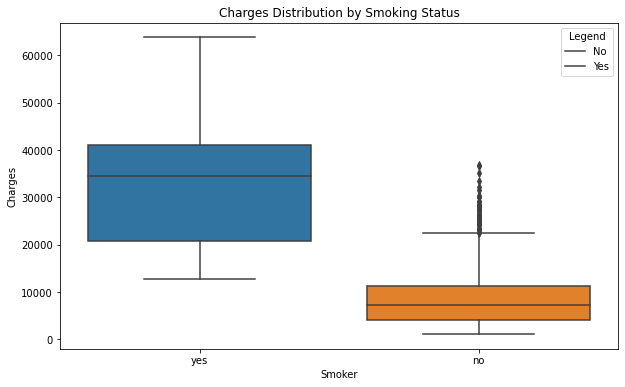

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Charges Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend(title = 'Legend', labels = ['No', 'Yes'], loc = 'upper right')
plt.show()

In [11]:
# Frequency check
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#### Performing a Two-Sample T-test (HYPOTHESIS TESTING CONCLUSION):

The test yielded a t-statistic of 32.7519 and a p-value of 0.000. Since the p-value is significantly less than the significance level of 0.05, we reject the null hypothesis. This means that there is a statistically significant difference in average charge between smokers and non-smokers. Smokers tend to have higher medical charges compared to non-smokers. The box plot further supports this conclusion, showing a higher median and a broader range of charges for smokers. This visual evidence complements the statistical test, highlighting the impact of smoking status on medical costs.

The box plot for 'charges' reveals potential outliers, especially in the group of smokers, indicating that some individuals have significantly higher medical charges than others.

### Correctional Analysis

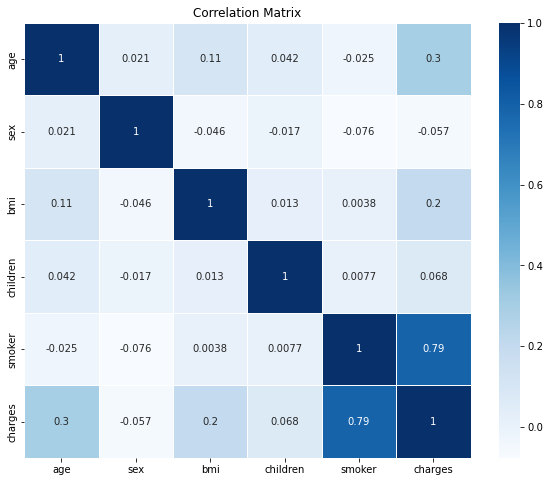

In [12]:
# CORRECTIONAL ANALYSIS

# Map Strings to Int
sex_int = {'male': 0, 'female': 1}
smoker_int = {'no': 0, 'yes': 1}

# Apply mappings
insurance_df['sex'] = insurance_df['sex'].map(sex_int)
insurance_df['smoker'] = insurance_df['smoker'].map(smoker_int)
insurance_df['region'] = insurance_df['region'].astype('category')

correlation_matrix = insurance_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Analyzing Relationship across Different Features (CORRECTIONAL ANALYSIS CONCLUSION):

Performing a Correlation Analysis and creating a Correlation matrix, it is clear that for the most part, different features have very little correlation with one another. Among the weakest are Children vs Age and Children vs BMI, with a weak positive correlation at only 0.042 and 0.013 respectively. Nevertheless, some data points have stronger positive correlations such as Age vs. Charges and BMI vs Charges. For the relationship between age and charges, the above linear regression model supports the data found in this matrix, with a value of 0.3 highlighting a moderately positive correlation. Similarly, the relationship between BMI and Charges has a correlation value of 0.2, which one again highlights a moderately positive correlation. Finally, the strongest correlation occurs with charges and smoker status. Shown in the hypothesis test above as well, a value of 0.79 in the correlation matrix suggests that smokers have increased charges compared to non-smokers. The slight negative correlation values for sex as it relates to charges, smoker, children, and BMI suggests that all of these features have larger values for males than for females. Nonetheless, this relationship is very weak as shown by the small values closer to 0.

For the most part however, no 2 unique features exhibit a correlation value greater than 0.3 except for smokers and charges, which establishes the fact that outside of smoker status and charges, there is no strong or definitive relationship between any two features, and most relationships are either weak or moderately positive.


## PRIMARY ANALYSIS ##

For the primary analysis, we will use machine learning algorithms to create a classification model and a regression model. These two models will help us truly understand if we can predict the cost of a patients health insurance based on other provided features such as age, sex, and BMI. For the classification model, I will test 4 different models including Random Forest, KNN, Decision Tree, and Logistic Regression, in order to identify any trends where charges are viewed in a binary sense. For this, charges will be categorized into "Expensive" and "Cheap", where 14,000 dollars is the boundary separating the two categories. After testing the accuracy of each categorical model using training data, I will choose one with high accuracy and complete the analysis in order to figure out which features influence the charge amount the most. 

After completing a classification model, I will also create a regression model that will analyze charges as a continuous variable instead of a discrete one. This way, I will be able to see exactly how the increase in charge correlates with the different features, and I will be able to analyze the effectiveness of the model when it comes to predicting charges based on a given set of features. This will help highlight how impactful the overall features are as a whole as they relate to the charge amounts.

**REQUIRED TOOLS**

* pandas
* matplotlib.pyplot
* seaborn
* scipy.stats
* numpy
* train_test_split, cross_val_score, StratifiedKFold from sklearn.model_selection
* Linear Regression, LogisticRegression from sklearn.linear_model
* StandardScaler from sklearn.preprocessing
* mean_absolute_error, mean_squared_error from sklearn.metrics
* KNeighborsClassifier from sklearn.neighbors
* DecisionTreeClassifier from sklearn.tree
* RandomForestClassifier from sklearn.ensemble

In [13]:
# Perform One-Hot-Encoding on Location Categorical Data
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['region'])
print(insurance_df_encoded)

      age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    1  27.900         0       1  16884.92400                 0   
1      18    0  33.770         1       0   1725.55230                 0   
2      28    0  33.000         3       0   4449.46200                 0   
3      33    0  22.705         0       0  21984.47061                 0   
4      32    0  28.880         0       0   3866.85520                 0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    0  30.970         3       0  10600.54830                 0   
1334   18    1  31.920         0       0   2205.98080                 1   
1335   18    1  36.850         0       0   1629.83350                 0   
1336   21    1  25.800         0       0   2007.94500                 0   
1337   61    1  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                

In [14]:
charges_mean = insurance_df['charges'].mean()
# Get Mean to Figure out boundary value
print(charges_mean)

13270.422265141257


**Using this mean, we will create out boundary value for the classificiation binary charges variable. We set the boundary at 14,000 dollars**

In [15]:
# Set X and y variables, where 14000 is our boundary for cheap vs expensive binary encoding
X = insurance_df_encoded.drop(columns=['charges'])
insurance_df_encoded['expensive'] = insurance_df_encoded['charges'] > 14000
y = insurance_df_encoded['expensive'].astype(int)

# Reset data frame by removing expensive column created above
insurance_df_encoded = insurance_df_encoded.drop(columns=['expensive'])
print(X)
print(y)

      age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19    1  27.900         0       1                 0                 0   
1      18    0  33.770         1       0                 0                 0   
2      28    0  33.000         3       0                 0                 0   
3      33    0  22.705         0       0                 0                 1   
4      32    0  28.880         0       0                 0                 1   
...   ...  ...     ...       ...     ...               ...               ...   
1333   50    0  30.970         3       0                 0                 1   
1334   18    1  31.920         0       0                 1                 0   
1335   18    1  36.850         0       0                 0                 0   
1336   21    1  25.800         0       0                 0                 0   
1337   61    1  29.070         0       1                 0                 1   

      region_southeast  region_southwes

In [16]:
# Create testing and training sets, and standardize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

In [18]:
# Find Accuracy and Standard Deviation of all 4 models to choose which model will work best.
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Iterate through all 4 models
for model_name, model in models.items():
    cv_result = cross_val_score(model, X_train, y_train, cv=skf)
    print(f'{model_name}: Mean = {cv_result.mean()}, Std Dev = {cv_result.std()}')

KNN: Mean = 0.900318407960199, Std Dev = 0.021061943293782578
Decision Tree: Mean = 0.8544477611940298, Std Dev = 0.019981522862622555
Logistic Regression: Mean = 0.9072935323383085, Std Dev = 0.017355287659737432
Random Forest: Mean = 0.9212487562189056, Std Dev = 0.02821692307206367


Based on the analysis above, we will use Random Forest as it has the highest mean with the lowest standard deviation for the data set. This highlights that it is the most accurate machine learning model out of the ones available. Logistic Regression is also a viable option as its values are very similar, but the Random Forest model edges this model out slightly, and so we will choose Random Forest

In [19]:
randomForest_model = RandomForestClassifier(random_state=42)

In [20]:
randomForest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = randomForest_model.predict(X_test)

In [21]:
# Get Accuracy, Precision, and Recall report for the Random Forest Test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9283582089552239
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       240
           1       0.96      0.78      0.86        95

    accuracy                           0.93       335
   macro avg       0.94      0.88      0.91       335
weighted avg       0.93      0.93      0.93       335

Confusion Matrix:
[[237   3]
 [ 21  74]]


Looking at the Accuracy, Classification Report, and Confusion Matrix, it is clear that this Random Forest Model has high accuracy, precision, and recall, which is imperative for a successful model to predict future data points. In the confusion matrix, we can see that there are only 6 false positives and 19 false negatives, while there are 233 true negatives. This data overall showcases that the Random Forest was the right model to choose for this analysis

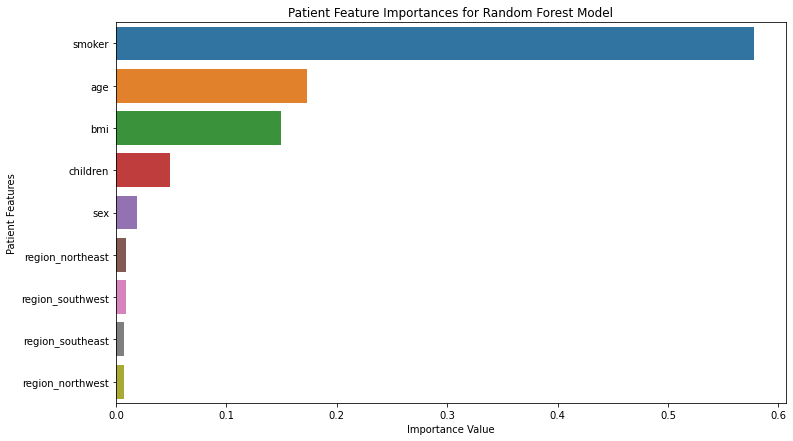

In [22]:
# Plot Graph to see which features are most influential for the charge amount

feature_importances = pd.Series(randomForest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize = (12, 7))
sns.barplot(x = feature_importances, y = feature_importances.index)
plt.title('Patient Feature Importances for Random Forest Model')
plt.xlabel('Importance Value')
plt.ylabel('Patient Features')
plt.show()

## Visualization (Random Forest Model) ##

Based on the Random Forest Machine Learning Analysis, it is clear that there are certain features of a patient that influence the overall charges. For this model, a binary charge variable was used, where "Expensive" accounted for charges 14,000 dollars and above, and "Cheap" accounted for charges below 14,000 dollars. This boundary was established based on the mean of the charges data, which was 13,270 dollars. Based on this boundary, the Random Forest model showcases that smoker status is the most significant influence on the overall charge of health insurance. From there, Age and BMI are similar in importance, with age being slightly larger. Nonetheless, the large gap between these features and smoker status highlights that they do not have nearly as much influence as the smoker status of an individual. Further, the amount of children and the sex of the patient play a minimal role in the charges. Finally the location plays almost no role in charge amount as all 4 locations have approximately equal importance values.


### Linear Regression Model ##

The Random Forest Model accurately depicted the feature importance of the different categories in the data set, highlighting the fact that age, smoker status, and bmi are amongst the most important when determining where the health insurance cost will be cheap or expensive. However, now we would like to see the generality of the costs in order to understand how the charges itself differ across across these different features, instead of simply claiming whether they are "cheap" or "expensive"

In [23]:
# Set X and y value, where charges is a continuous variable
X = insurance_df_encoded.drop(columns=['charges'])
y = insurance_df_encoded['charges']

In [24]:
# Set training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
linear_model = LinearRegression()

In [26]:
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [27]:
# Understand error values to take into account for analysis
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 4243.6541166531315
Root Mean Squared Error: 5926.023602394467


The Mean Absolute Error (MAE) here indicates that the predictions of the Linear Regression Model may have an error of around 1743 dollars. This must be taken into account when looking at the results in order to accurately conclude which features influence cost the most. Nonetheless, this value is not very high when considering the large scale charges present in the data set. Furthermore, the Root Mean Squared Error signifies that the predictied values are an average magnitude of 3600 dollars away from the actual values in the data table. We must take these error values into account when we finalize our analysis.

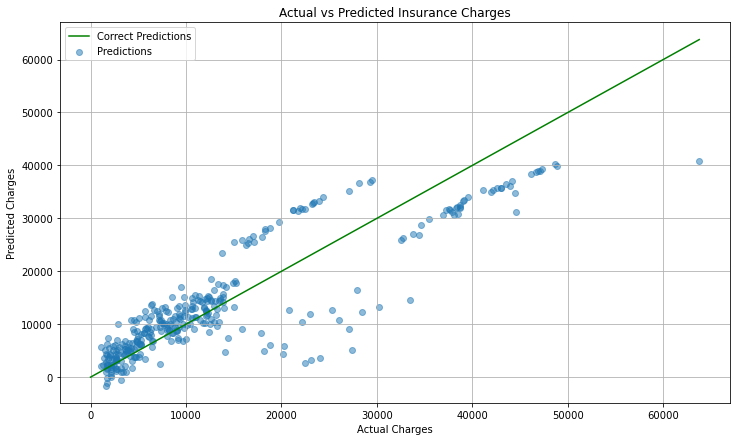

In [28]:
# Plot prediction points to see how well model is able to predict charges based on the patients features
plt.figure(figsize=(12, 7))
plt.scatter(y_test, y_pred, alpha=0.5)

# Plots center line indicating correct predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'g')
# Label Graph
plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend(['Correct Predictions', 'Predictions'])
plt.grid(True)
plt.show()

The Graph Showcases that for smaller charge values, the model is able to make somewhat accurate predictions, however, the error found before can be seen in the larger charge values, as the data points stray further from the correct prediction line.

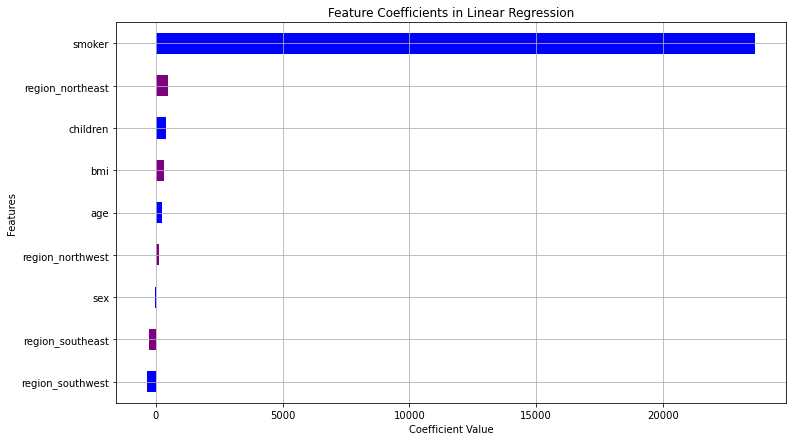

In [29]:
# Graph importance level of each feature as it relates to changes in charge amounts 
coefficients = pd.Series(linear_model.coef_, index=X.columns).sort_values()
plt.figure(figsize=(12, 7))
coefficients.plot(kind='barh', color = ['blue', 'purple'])

# Label Graph
plt.title('Feature Coefficients in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()

## Visualization (Linear Regression Model) ###

Based on the Linear Regression Machine Learning Analysis, it is clear that smoker status is the most significant influence on the overall charge of health insurance. This is supported by the Random Forest Model as well. However, some data points in this analysis differ in comparison to the Random Forest. For example the second most impactful feature was the northeast region, which is a stark contrast to the no-impact importance value of all regions in the Random Forest. From there, Age, Sex, and Children are similar in importance, with children and sex being slightly larger. Nonetheless, the large gap between these features and smoker status highlights that they do not have nearly as much influence as the smoker status of an individual. Finally, BMI has almost no impact according to the regression model, which contrasts the high importance level found in the Random Forest model. These variations can be explained by the error level in the predictions. For this model, the Mean Absolute Error (MAE) was approximately 1743, indicating that predictions could be off by around 1743 dollars. This MAE could easily skew the data in a way that incorrectly promotes certain feature importances over others. Furthermore, the dot plot above showcases that as the charges increase in value, the predictions become more varied, and these larger values could account for enough variable shifts to skew the results of the feature importance chart. For that reason, I believe that the Random Forest is the better indication of feature importance, yet both models confirm that the smoker status is most linked to charge values.

## Insights and Conclusions ###


In our introduction, we stated that we wanted to find out how different factors of an individual can affect medical costs. Overall, it is clear from the data and the model analysis that the smoker status of an individual is the biggest factor when it comes to influencing health insurance costs. From a logical standpoint, this makes sense as those who smoke frequently are more prone to health risks that require medical attention. For that reason, it is likely that insurance companies take this into account and increase the overall costs. However, this also comes at an unfortunate cost, where those who smoke make have a harder time finding the help they need due to signficantly more expensive price points.

Looking through this analysis, readers can make note of not only the smoker status of an individual as it relates to insurance costs, but also other factors such as age and BMI. While smoker status is more influential, these features also play a role in the charges. This is something that the reader may not have known previously, but the graphs, tests, and model analyses make it clear that different people receive different health insurance costs, and these costs could unfairly harm certain people over others. Thus, we can inform people to begin public health initiatives, smoking cessation programs, and other services aimed at reducing associated medical costs, and this leads us to say that an individual's health and lifestyle choices have a large effect on what health insurance charges. In conclusion, we hope that the readers of this study can take this data to lobby for policy change so that everyone has access to affordable health care and everyone can get the help that they need.

### Bibliography ###

Choi, M. (2018). Insurance Dataset. Retrieved from Kaggle.


#### Other Useful Resources ####

[CDC Analysis of Health Insurance](https://www.cdc.gov/nchs/data/nhsr/nhsr177.pdf)

[Health Insurance US Census Bureau](https://www.census.gov/library/publications/2023/demo/p60-281.html)

[Peter G. Peterson Foundation](https://www.pgpf.org/blog/2023/11/the-share-of-americans-without-health-insurance-in-2022-matched-a-record-low)